In [ ]:
!pip install pyLDAvis
!pip install nltk
!pip install wordcloud
!pip install keras

     |████████████████████████████████| 1.7 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 43.5 MB/s 
     |████████████████████████████████| 15.7 MB 46.6 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=e54be14e694c7d8a1706deb97da4221477aa6a582d2b06e92bf3e6a50e8ef913
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import keras

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/Project/dep_excel.xlsx'
dataset = pd.read_excel(path)
dataset.describe

<bound method NDFrame.describe of                                           Comments Text
0     So, when you ask what the two illnesses are......
1     In addition, people with BPD quite often have ...
2     Borderline Personality Disorder, like all othe...
3     LONG ANSWER: Bipolar disease is caused by a ch...
4     Well think of bipolar as a rollar coaster you ...
...                                                 ...
7140  Please contact SADAG (south African depression...
7141  It gave me severe ataxia.  (ataxia = People wi...
7142  I have. Caused muscles to tense up swelling an...
7143  Lamictal is my miracle med.Only took me 26 yea...
7144  I take Wellbutrin, topamax, and buspar (antide...

[7145 rows x 1 columns]>

In [ ]:
dataset.shape

(7145, 1)

In [ ]:
dataset.isnull().sum()

Comments Text    0
dtype: int64

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

for i in range(len(dataset)):
  dataset.at[i,'Comments Text'] = remove_urls(dataset.iloc[i]['Comments Text'])
dataset.describe

<bound method NDFrame.describe of                                           Comments Text
0     So, when you ask what the two illnesses are......
1     In addition, people with BPD quite often have ...
2     Borderline Personality Disorder, like all othe...
3     LONG ANSWER: Bipolar disease is caused by a ch...
4     Well think of bipolar as a rollar coaster you ...
...                                                 ...
7140  Please contact SADAG (south African depression...
7141  It gave me severe ataxia.  (ataxia = People wi...
7142  I have. Caused muscles to tense up swelling an...
7143  Lamictal is my miracle med.Only took me 26 yea...
7144  I take Wellbutrin, topamax, and buspar (antide...

[7145 rows x 1 columns]>

In [ ]:
# Convert to list
data = dataset['Comments Text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

['So, when you ask what the two illnesses are...theyre similar in that they tend to have moodiness involved, impulsivity and self-damaging behaviors for compensatory measures. Otherwise, theyre not really that similar, but they do seem to "like" one another and often show up in the same person...making their lives chaotic, difficult, dysfunctional, and intense. So, if your friend is concerned that they may have one (or both) of these illnesses, they should not be ashamed. Its definitely not their fault. They should, instead, get help from a professional...and INSIST that they are treated appropriately with the correct types of therapy and medication.']


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['so', 'when', 'you', 'ask', 'what', 'the', 'two', 'illnesses', 'are', 'theyre', 'similar', 'in', 'that', 'they', 'tend', 'to', 'have', 'moodiness', 'involved', 'impulsivity', 'and', 'self', 'damaging', 'behaviors', 'for', 'compensatory', 'measures', 'otherwise', 'theyre', 'not', 'really', 'that', 'similar', 'but', 'they', 'do', 'seem', 'to', 'like', 'one', 'another', 'and', 'often', 'show', 'up', 'in', 'the', 'same', 'person', 'making', 'their', 'lives', 'chaotic', 'difficult', 'dysfunctional', 'and', 'intense', 'so', 'if', 'your', 'friend', 'is', 'concerned', 'that', 'they', 'may', 'have', 'one', 'or', 'both', 'of', 'these', 'illnesses', 'they', 'should', 'not', 'be', 'ashamed', 'its', 'definitely', 'not', 'their', 'fault', 'they', 'should', 'instead', 'get', 'help', 'from', 'professional', 'and', 'insist', 'that', 'they', 'are', 'treated', 'appropriately', 'with', 'the', 'correct', 'types', 'of', 'therapy', 'and', 'medication']]


In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['so', 'when', 'you', 'ask', 'what', 'the', 'two', 'illnesses', 'are', 'theyre', 'similar', 'in', 'that', 'they', 'tend', 'to', 'have', 'moodiness', 'involved', 'impulsivity', 'and', 'self', 'damaging', 'behaviors', 'for', 'compensatory', 'measures', 'otherwise', 'theyre', 'not', 'really', 'that', 'similar', 'but', 'they', 'do', 'seem', 'to', 'like', 'one', 'another', 'and', 'often', 'show', 'up', 'in', 'the', 'same', 'person', 'making', 'their', 'lives', 'chaotic', 'difficult', 'dysfunctional', 'and', 'intense', 'so', 'if', 'your', 'friend', 'is', 'concerned', 'that', 'they', 'may', 'have', 'one', 'or', 'both', 'of', 'these', 'illnesses', 'they', 'should', 'not', 'be', 'ashamed', 'its', 'definitely', 'not', 'their', 'fault', 'they', 'should', 'instead', 'get', 'help', 'from', 'professional', 'and', 'insist', 'that', 'they', 'are', 'treated', 'appropriately', 'with', 'the', 'correct', 'types', 'of', 'therapy', 'and', 'medication']


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization

stop_words = set(stopwords.words("english"))


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['ask', 'illness', 'be', 'similar', 'tend', 'moodiness', 'involved', 'impulsivity', 'self', 'damaging', 'behavior', 'compensatory', 'measure', 'otherwise', 'be', 'really', 'similar', 'seem', 'one', 'often', 'show', 'person', 'make', 'live', 'chaotic', 'difficult', 'dysfunctional', 'intense', 'friend', 'concern', 'may', 'illness', 'ashamed', 'definitely', 'fault', 'instead', 'get', 'help', 'professional', 'insist', 'treat', 'appropriately', 'correct', 'type', 'therapy', 'medication']]


In [ ]:
dataset = []
for i in range(len(data_lemmatized)):
    dataset.append(" ".join(data_lemmatized[i]))
dataset = pd.Series(dataset)

In [ ]:
no_features = 15000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=no_features)
tfidf = tfidf_vectorizer.fit_transform(dataset)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(min_df=0.05,max_features=no_features)
tf = tf_vectorizer.fit_transform(dataset)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
no_topics = 2

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5,max_iter=10000).fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 25
print('NMF')
display_topics(nmf, tfidf_feature_names, no_top_words)
print('LDA')
display_topics(lda, tf_feature_names, no_top_words)

NMF
Topic 0:
be, go, help, take, feel, get, know, time, med, make, try, thing, day, work, would, people, need, have, think, life, good, want, year, say, find
Topic 1:
anxiety, depression, depression anxiety, bipolar, anxiety depression, take, bipolar depression anxiety, bipolar depression, help anxiety, severe, disorder, help, work, anxiety attack, attack, also, severe anxiety, suffer, bipolar anxiety, symptom, anxiety disorder, med, anxiety take, high, anxiety med
LDA
Topic 0:
be, feel, go, know, day, people, get, time, think, say, life, want, thing, have, make, would, struggle, even, love, try, can, understand, tell, good, way
Topic 1:
anxiety, take, help, med, work, depression, also, bipolar, get, need, find, medication, try, doctor, year, may, make, well, go, use, disorder, sleep, good, time, would


In [ ]:
# Create Document — Topic Matrix
lda_output = lda.transform(tf)
# column names
topicnames = ['Topic' + str(i) for i in range(lda.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(dataset))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
path2 = '/content/gdrive/MyDrive/Project/dep_excel_2.xlsx'
dataset2 = pd.read_excel(path2)
df_document_topics.reset_index(inplace=True,drop=True)
dataset2['label'] = df_document_topics['dominant_topic']


In [ ]:
dataset2.describe

<bound method NDFrame.describe of                                           Comments Text  label
0     So, when you ask what the two illnesses are......      0
1     In addition, people with BPD quite often have ...      0
2     Borderline Personality Disorder, like all othe...      0
3     LONG ANSWER: Bipolar disease is caused by a ch...      1
4     Well think of bipolar as a rollar coaster you ...      0
...                                                 ...    ...
7140  Please contact SADAG (south African depression...      1
7141  It gave me severe ataxia.  (ataxia = People wi...      1
7142  I have. Caused muscles to tense up swelling an...      1
7143  Lamictal is my miracle med.Only took me 26 yea...      1
7144  I take Wellbutrin, topamax, and buspar (antide...      1

[7145 rows x 2 columns]>

In [ ]:
# Create Document — Topic Matrix
nmf_output = nmf.transform(tfidf)
# column names
topicnames = ['Topic' + str(i) for i in range(nmf.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(dataset))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
dataset1 = pd.read_excel('/content/gdrive/MyDrive/Project/dep_excel.xlsx')
df_document_topics.reset_index(inplace=True,drop=True)
dataset1['label'] = df_document_topics['dominant_topic']

In [ ]:
dataset1.describe

<bound method NDFrame.describe of                                           Comments Text  label
0     So, when you ask what the two illnesses are......      0
1     In addition, people with BPD quite often have ...      0
2     Borderline Personality Disorder, like all othe...      0
3     LONG ANSWER: Bipolar disease is caused by a ch...      0
4     Well think of bipolar as a rollar coaster you ...      0
...                                                 ...    ...
7140  Please contact SADAG (south African depression...      0
7141  It gave me severe ataxia.  (ataxia = People wi...      0
7142  I have. Caused muscles to tense up swelling an...      0
7143  Lamictal is my miracle med.Only took me 26 yea...      0
7144  I take Wellbutrin, topamax, and buspar (antide...      0

[7145 rows x 2 columns]>

In [ ]:
dataset1[dataset1['label'] == 1] 

TypeError: ignored

In [ ]:
# Convert to list
data = dataset1['Comments Text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove distracting commas
data = [re.sub(",", "", sent) for sent in data]

# Remove distracting commas
data = [sent.lower() for sent in data]

# Remove distracting dots
data = [sent.replace('.', '') for sent in data]

print(data[:1])


['so when you ask what the two illnesses aretheyre similar in that they tend to have moodiness involved impulsivity and self-damaging behaviors for compensatory measures otherwise theyre not really that similar but they do seem to "like" one another and often show up in the same personmaking their lives chaotic difficult dysfunctional and intense so if your friend is concerned that they may have one (or both) of these illnesses they should not be ashamed its definitely not their fault they should instead get help from a professionaland insist that they are treated appropriately with the correct types of therapy and medication']


In [ ]:
tweets = np.array(data)
labels = np.array(dataset2['label'])

In [ ]:
print(len(tweets),len(labels))

7145 7145


In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras import layers
#from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
max_words = 20000
max_len = 400

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  213    2  116]
 [   4  145 1962 ...  276    2 6012]
 [   2   33 8154 ...   33    4  114]
 ...
 [   0    0    0 ...    2  290  439]
 [   0    0    0 ...  160  219  244]
 [   0    0    0 ...   10   72   58]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

5358 1787 5358 1787


In [ ]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 40))
model1.add(layers.LSTM(40,dropout=0.5))
model1.add(layers.Dense(1,activation='sigmoid'))

model1.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=7,validation_data=(X_test, y_test))

Epoch 1/7
168/168 [==============================] - 41s 227ms/step - loss: 0.5734 - accuracy: 0.6915 - val_loss: 0.3896 - val_accuracy: 0.8327
Epoch 2/7
168/168 [==============================] - 37s 223ms/step - loss: 0.3340 - accuracy: 0.8667 - val_loss: 0.2727 - val_accuracy: 0.8870
Epoch 3/7
168/168 [==============================] - 37s 220ms/step - loss: 0.2596 - accuracy: 0.9044 - val_loss: 0.2519 - val_accuracy: 0.8920
Epoch 4/7
168/168 [==============================] - 37s 220ms/step - loss: 0.2229 - accuracy: 0.9175 - val_loss: 0.3677 - val_accuracy: 0.8651
Epoch 5/7
168/168 [==============================] - 37s 221ms/step - loss: 0.1882 - accuracy: 0.9330 - val_loss: 0.2507 - val_accuracy: 0.8993
Epoch 6/7
168/168 [==============================] - 38s 224ms/step - loss: 0.1661 - accuracy: 0.9408 - val_loss: 0.2437 - val_accuracy: 0.8987
Epoch 7/7
168/168 [==============================] - 37s 221ms/step - loss: 0.1402 - accuracy: 0.9505 - val_loss: 0.3910 - val_accuracy:

In [ ]:
test_loss, test_acc = model1.evaluate(X_test,  y_test, verbose=2)
print('Model accuracy: ',test_acc)

56/56 - 2s - loss: 0.3910 - accuracy: 0.8685 - 2s/epoch - 35ms/step
Model accuracy:  0.8684946894645691


In [ ]:
y_pred = model1.predict(X_test)

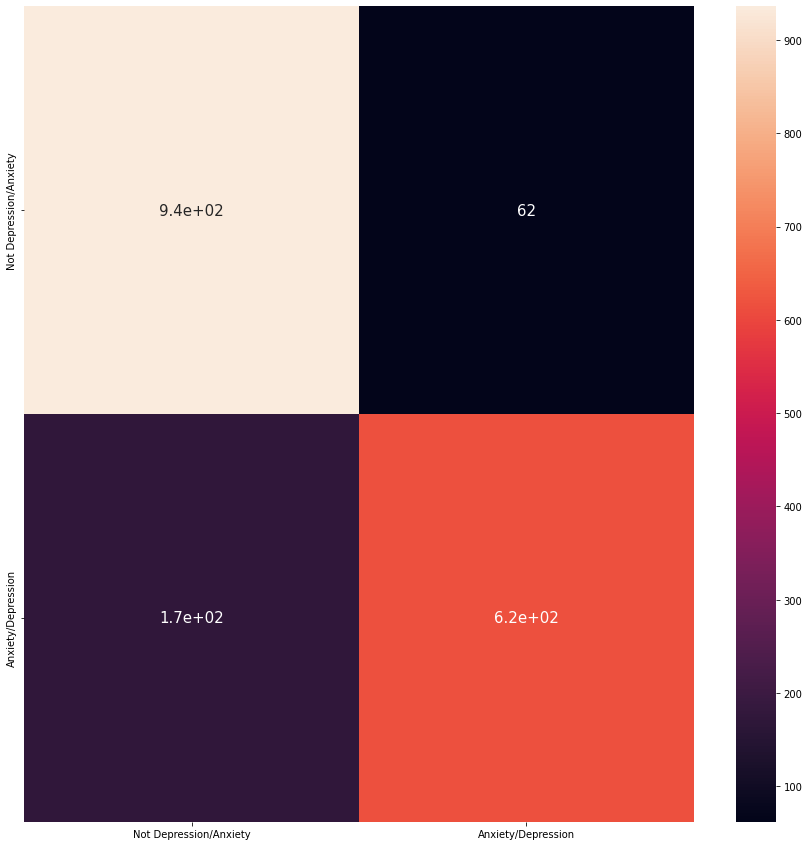

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Not Depression/Anxiety','Anxiety/Depression'],columns = ['Not Depression/Anxiety','Anxiety/Depression'])
#Normalizing
conf_matrix = conf_matrix.astype('float') 
conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [ ]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40))
model2.add(layers.LSTM(40,dropout=0.5,return_sequences=True))
model2.add(layers.LSTM(40,dropout=0.5))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
168/168 [==============================] - 77s 436ms/step - loss: 0.5426 - accuracy: 0.7152 - val_loss: 0.3651 - val_accuracy: 0.8411
Epoch 2/5
168/168 [==============================] - 71s 424ms/step - loss: 0.3261 - accuracy: 0.8703 - val_loss: 0.2995 - val_accuracy: 0.8791
Epoch 3/5
168/168 [==============================] - 73s 437ms/step - loss: 0.2384 - accuracy: 0.9093 - val_loss: 0.2810 - val_accuracy: 0.8808
Epoch 4/5
168/168 [==============================] - 74s 443ms/step - loss: 0.1895 - accuracy: 0.9267 - val_loss: 0.3536 - val_accuracy: 0.8478
Epoch 5/5
168/168 [==============================] - 74s 441ms/step - loss: 0.1650 - accuracy: 0.9393 - val_loss: 0.4272 - val_accuracy: 0.8556


In [ ]:
test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)
print('Model accuracy: ',test_acc)

56/56 - 4s - loss: 0.4272 - accuracy: 0.8556 - 4s/epoch - 73ms/step
Model accuracy:  0.8556239604949951


In [ ]:
y_pred = model2.predict(X_test)

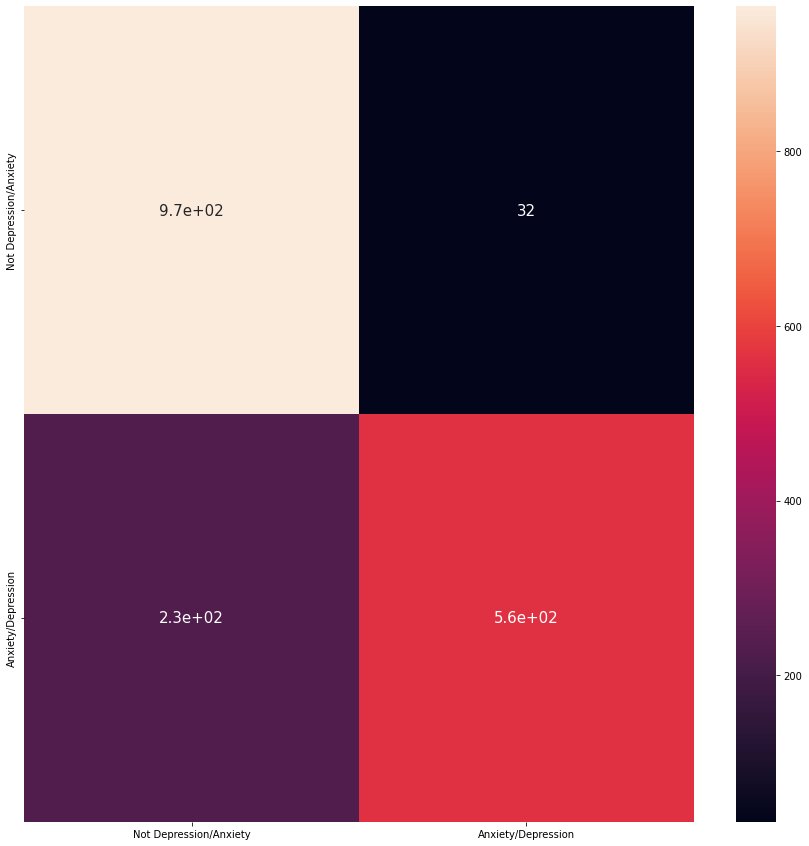

In [ ]:
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['Not Depression/Anxiety','Anxiety/Depression'],columns = ['Not Depression/Anxiety','Anxiety/Depression'])
#Normalizing
conf_matrix = conf_matrix.astype('float') 
conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [ ]:
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40))
model3.add(layers.Bidirectional(layers.LSTM(40,dropout=0.5)))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, y_train, epochs=8,validation_data=(X_test, y_test))

Epoch 1/8
168/168 [==============================] - 66s 366ms/step - loss: 0.5924 - accuracy: 0.6835 - val_loss: 0.4665 - val_accuracy: 0.8019
Epoch 2/8
168/168 [==============================] - 62s 367ms/step - loss: 0.3631 - accuracy: 0.8544 - val_loss: 0.2928 - val_accuracy: 0.8830
Epoch 3/8
168/168 [==============================] - 62s 369ms/step - loss: 0.2577 - accuracy: 0.9072 - val_loss: 0.2777 - val_accuracy: 0.8875
Epoch 4/8
168/168 [==============================] - 62s 370ms/step - loss: 0.2599 - accuracy: 0.9121 - val_loss: 0.2626 - val_accuracy: 0.8926
Epoch 5/8
168/168 [==============================] - 62s 369ms/step - loss: 0.1995 - accuracy: 0.9306 - val_loss: 0.3044 - val_accuracy: 0.8881
Epoch 6/8
168/168 [==============================] - 63s 375ms/step - loss: 0.1580 - accuracy: 0.9446 - val_loss: 0.3068 - val_accuracy: 0.8691
Epoch 7/8
168/168 [==============================] - 63s 373ms/step - loss: 0.1427 - accuracy: 0.9526 - val_loss: 0.2794 - val_accuracy:

In [ ]:
y_pred = model3.predict(X_test)

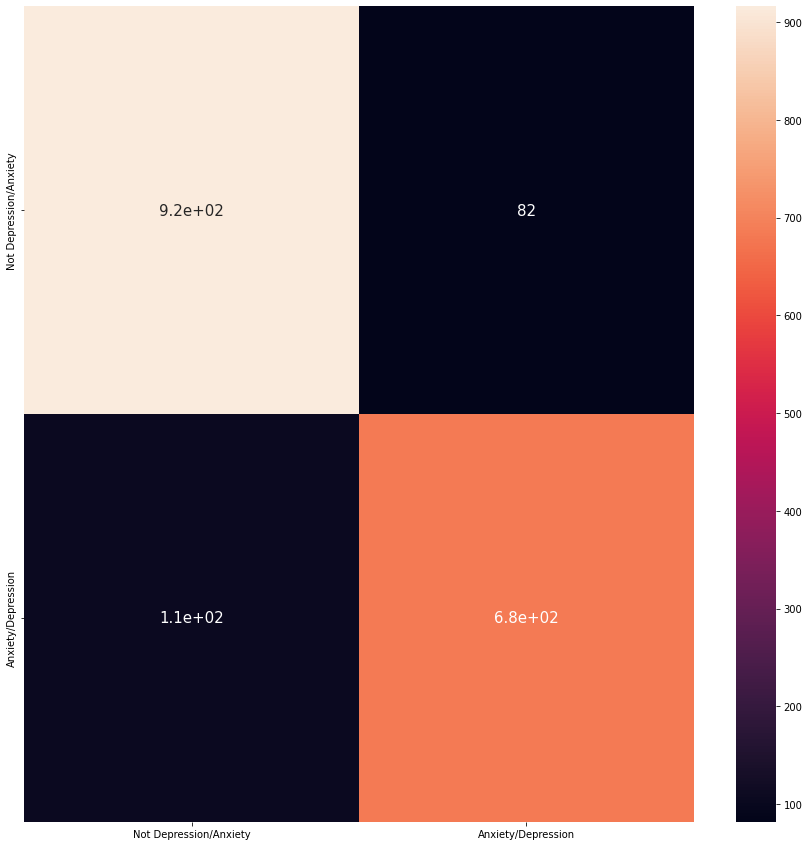

In [ ]:
matrix = confusion_matrix(y_test, np.around(y_pred, decimals=0))
conf_matrix = pd.DataFrame(matrix, index = ['Not Depression/Anxiety','Anxiety/Depression'],columns = ['Not Depression/Anxiety','Anxiety/Depression'])
#Normalizing
conf_matrix = conf_matrix.astype('float') 
conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [ ]:
test = np.array(['I feel stress, sadness and anxiety - just want to sleep until the lockdown ends'])
test_sequence = tokenizer.texts_to_sequences(test)
test_sequence = pad_sequences(test_sequence, maxlen=max_len)
test_prediction = model3.predict(test_sequence)
if np.around(test_prediction, decimals=0)[0][0] == 1.0:
    print('The model predicted depressive/anxious language')
else:
    print("The model predicted other type of language")

The model predicted other type of language


In [ ]:
tPath = '/content/gdrive/MyDrive/Project/tweets_data'
os.listdir(tPath)[:5]

['0314_1.csv', '0321_5.csv', '0321_4.csv', '0321_3.csv', '0321_2.csv']

In [ ]:
tweets = pd.read_csv('/content/gdrive/MyDrive/Project/tweets_data/0314_1.csv')
tweets.describe

<bound method NDFrame.describe of                     date  ...                                          permalink
0    2020-03-14 23:55:21  ...  https://twitter.com/AlbertoxVazquez/status/123...
1    2020-03-14 23:54:45  ...  https://twitter.com/TheOGKennedy/status/123897...
2    2020-03-14 23:45:58  ...  https://twitter.com/megmarie5/status/123897468...
3    2020-03-14 23:43:10  ...  https://twitter.com/BoozyBillsBabe/status/1238...
4    2020-03-14 23:42:39  ...  https://twitter.com/megmarie5/status/123897385...
..                   ...  ...                                                ...
283  2020-03-14 00:14:34  ...  https://twitter.com/jw8c/status/12386194940981...
284  2020-03-14 00:14:19  ...  https://twitter.com/Lumae_tinkk/status/1238619...
285  2020-03-14 00:08:46  ...  https://twitter.com/dpink_dpanda/status/123861...
286  2020-03-14 00:07:19  ...  https://twitter.com/Anton10937175/status/12386...
287  2020-03-14 00:04:13  ...  https://twitter.com/intuitiveshoob/status/12

In [ ]:
for dirname, _, filenames in os.walk(tPath):
    for filename in filenames:
        if filename!='0314_1.csv':
            temp = pd.read_csv(os.path.join(dirname, filename))
            tweets = pd.concat([tweets, temp], ignore_index=True)

In [ ]:
tweets.shape

(25425, 12)

In [ ]:
tweets.sort_values(by=['date'],inplace=True)
tweets.reset_index(drop=True,inplace=True)
tweets = tweets[['date','text']]

In [ ]:
tweets_dataset = tweets.copy()
tweets.describe

<bound method NDFrame.describe of                       date                                               text
0      2020-03-14 00:04:13  Damn just remembered this front bottoms show i...
1      2020-03-14 00:07:19  hapless Dementia joe will lose to Trump, even ...
2      2020-03-14 00:07:52                         it's making me anxious lol
3      2020-03-14 00:08:46  I’m so glad my depression kicked in I’m going ...
4      2020-03-14 00:11:16         Have some wine . You’ll feel less anxious.
...                    ...                                                ...
25420  2020-08-08 15:30:00  Betty Gabriela Rodríguez tiene como causa busc...
25421  2020-08-08 15:30:00  Betty Gabriela Rodríguez tiene como causa busc...
25422  2020-08-08 17:37:54  SpaceX lanza al espacio 57 satélites para serv...
25423  2020-08-10 13:45:17  Navegá todo el día con tu bono HOY de 10 GB so...
25424  2020-08-10 13:45:17  Navegá todo el día con tu bono HOY de 10 GB so...

[25425 rows x 2 columns]>

In [ ]:
#Removing non-ascii characters (for example, arabian chars)
tweets.text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
#Making all fields string type
for i in range(len(tweets)):
  tweets.at[i,'text'] = str(tweets.iloc[i]['text'])
#Removing URLs
for i in range(len(tweets)):
  tweets.at[i,'text'] = remove_urls(tweets.iloc[i]['text'])
# Convert to list
data = tweets.text.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [ ]:
data = np.array(data)
data[:10]

array(['Damn just remembered this front bottoms show is about to cure my depression',
       'hapless Dementia joe will lose to Trump, even if the economy craters into a full on depression & covid19 kills millions of people. Second you cannot expect to conduct an unfair, corrupt & illegitimate primary & expect people to fall in line. I voted for Hillary last time no mas.',
       'its making me anxious lol',
       'Im so glad my depression kicked in Im going to BED',
       'Have some wine . Youll feel less anxious.',
       'Everyone be patient. Messages blowing up. I know yall are anxious to bet something. I am doing mini write ups on each of the 6 games, because I want to be clear Im not just picking games for fucks sake. Theres a method to my madness. Once you pay, hang tight! Thank you!',
       'Cant wait to tell my kids about the toilet paper depression of 2020',
       'I think in order to keep sick hourly workers home, and to support people who cant work from home but have ki

In [ ]:
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[    0     0     0 ...  1058     8    50]
 [    0     0     0 ...   234    65    64]
 [    0     0     0 ...    15   396   594]
 ...
 [    0     0     0 ...  6504  2328  6504]
 [    0     0     0 ... 10164  6743  7890]
 [    0     0     0 ... 10164  6743  7890]]


In [ ]:
predictions = model3.predict(tweets)

In [ ]:
np.around(predictions, decimals=0)

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
tweets_dataset['label'] = np.around(predictions, decimals=0)

In [ ]:
for i in range(10):
    print(tweets_dataset.iloc[i*2]['text'])
    print('\n')

Damn just remembered this front bottoms show is about to cure my depression


it's making me anxious lol


Have some wine . You’ll feel less anxious.


Can’t wait to tell my kids about the toilet paper depression of 2020


<——— anxious bunny https://twitter.com/GlennonDoyle/status/1238449159168053250 …


And here we are the Great Depression of toilet paper


Depression is knocking at the door #Tougaloo_RYS20 #Jackson_RYS20https://twitter.com/UnderRatedTim/status/1238589018662715392 …


Take me back! Kind of been in a slight depression since being home. With all this virus crap, it’s making it worse! Kind of hard to return to normal life when people think the world is ending @Atlantis Bahamas https://www.instagram.com/p/B9sZ6Q9HmL-/?igshid=kku0lw1dwunw …


Take me back! Kind of been in a slight depression since being home. With all this virus crap, it’s making it worse! Kind of hard to return to normal life when people think the world is ending @Atlantis Bahamas https://www.instagram.co